### 신입교육세션 회귀분석 실습과 과제
1. 실습
- diabetes 데이터를 선형회귀식을 사용해 분석해봅시다!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('diabetes_XY.csv', index_col = 0)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#1 - formula 명시하지 않는 방법
Y = data.iloc[:, -1]
X = data.iloc[:, :-1]
X = sm.add_constant(X)

model = sm.OLS(Y, X)
res = model.fit()

print(res.summary())


                             OLS Regression Results                            
Dep. Variable:     disease_progression   R-squared:                       0.518
Model:                             OLS   Adj. R-squared:                  0.507
Method:                  Least Squares   F-statistic:                     46.27
Date:                 Thu, 13 Jul 2023   Prob (F-statistic):           3.83e-62
Time:                         20:38:11   Log-Likelihood:                -2386.0
No. Observations:                  442   AIC:                             4794.
Df Residuals:                      431   BIC:                             4839.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.06

In [5]:
#2 - R처럼 formula 사용하기 (다중회귀에서 변수 변경할 때 보다 편리함)
form_mod = ols('disease_progression ~ age + sex + bmi + bp + s1 + s2 + s3 + s4 + s5 + s6', data = data)
res2 = form_mod.fit()

print(res2.summary())

                             OLS Regression Results                            
Dep. Variable:     disease_progression   R-squared:                       0.518
Model:                             OLS   Adj. R-squared:                  0.507
Method:                  Least Squares   F-statistic:                     46.27
Date:                 Thu, 13 Jul 2023   Prob (F-statistic):           3.83e-62
Time:                         20:39:35   Log-Likelihood:                -2386.0
No. Observations:                  442   AIC:                             4794.
Df Residuals:                      431   BIC:                             4839.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.06

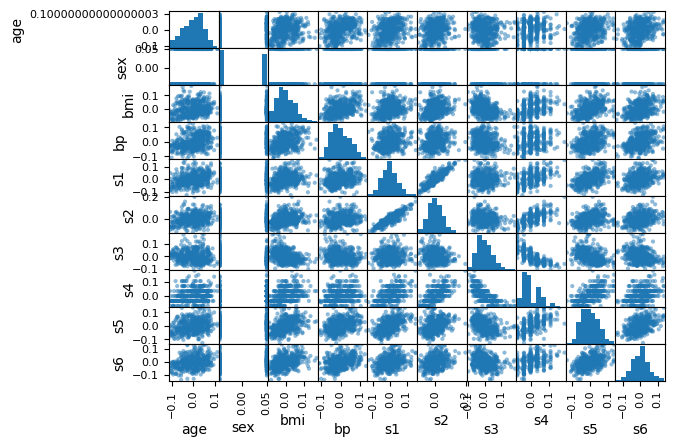

In [6]:
# 산점도 행렬 그리기 - 다중공선성 확인
X_ = X.iloc[:, 1:]
pd.plotting.scatter_matrix(X_)
plt.show()

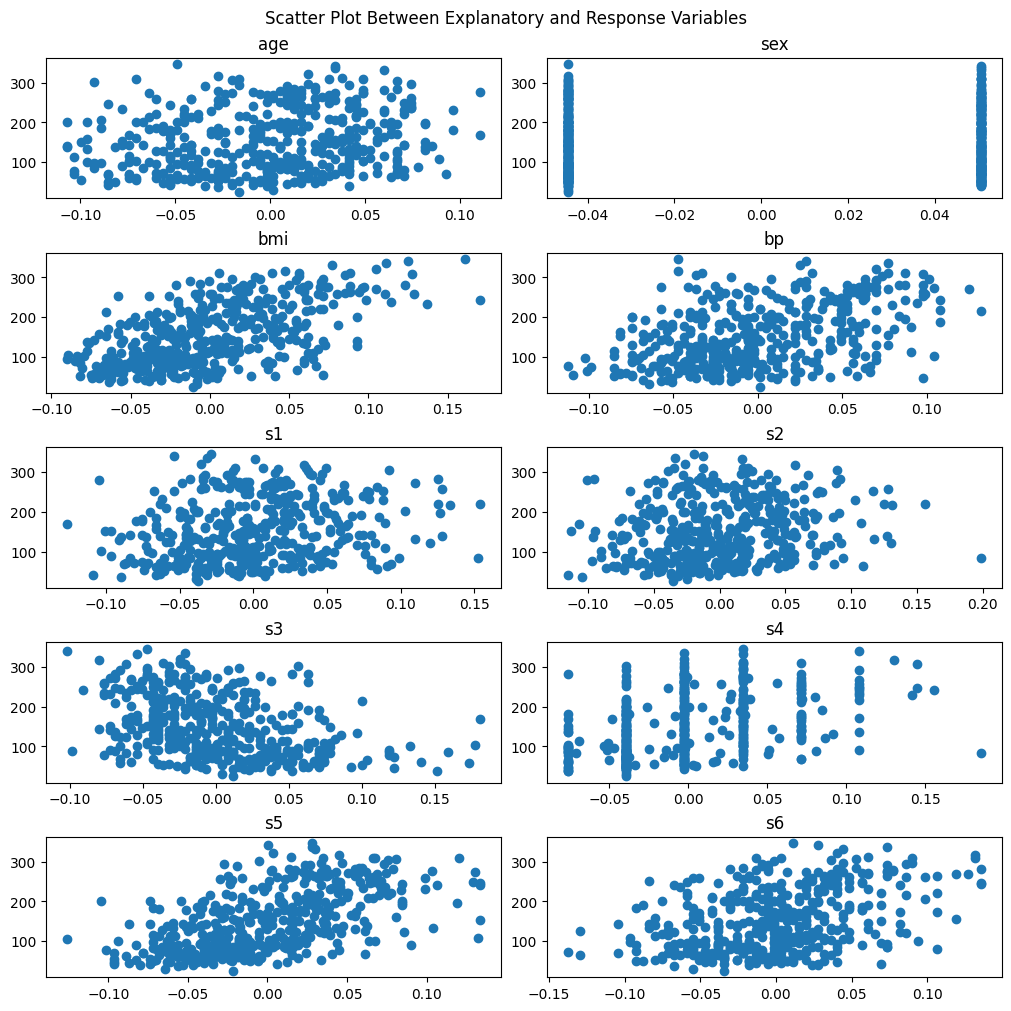

In [8]:
# 일반 산점도 한꺼번에 그리기

def draw_scatter(ii, jj, title):
    X_cols = np.array(X_.columns).reshape(ii,-1)
    fig, axs = plt.subplots(ii,jj, figsize = (10,10), layout = 'constrained')
    fig.suptitle(title)
    axs_list = [(i,j) for i in range(0,ii) for j in range(0,jj)]
    for ax in axs_list:
        axs[ax].set_title(X_cols[ax])
        axs[ax].scatter(X_[X_cols[ax]], Y)
    plt.show()

draw_scatter(5, 2, "Scatter Plot Between Explanatory and Response Variables")

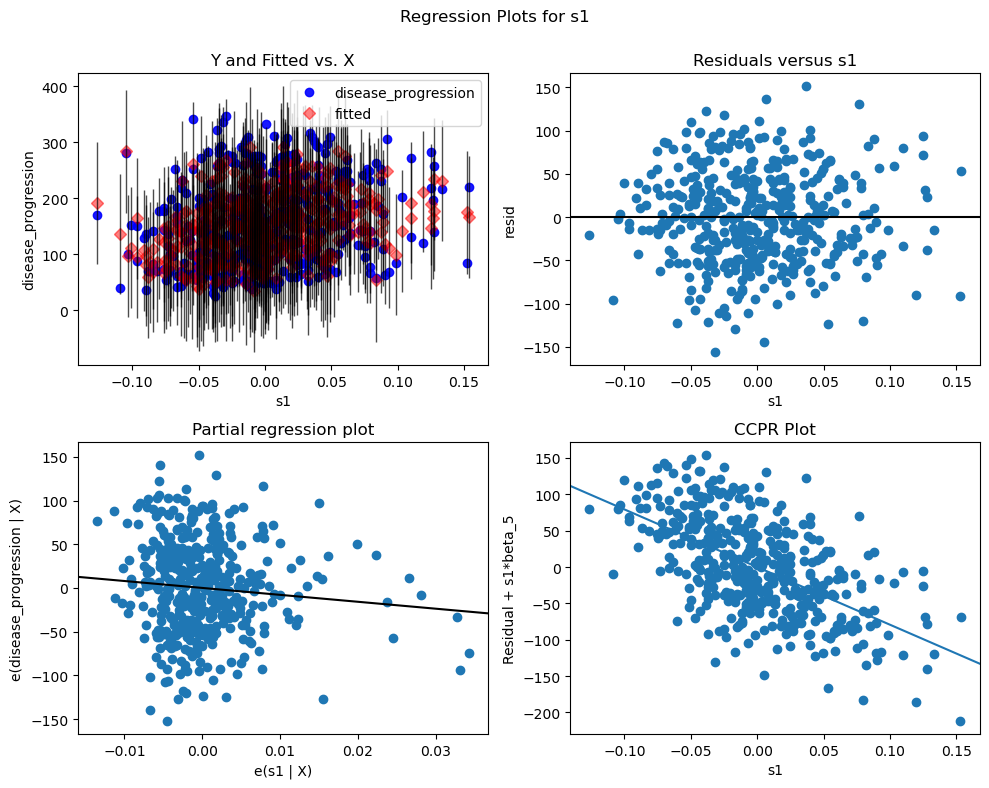

In [ ]:
#잔차도 + 다른 여러 그림 그리기
fig = plt.figure(figsize=(10, 8))
fig = sm.graphics.plot_regress_exog(form_mod.fit(), 's1', fig=fig)

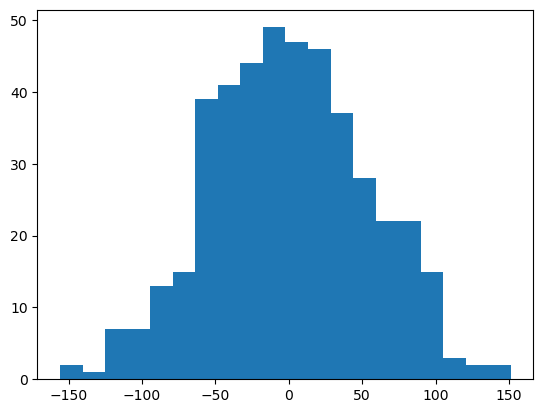

In [ ]:
#잔차 히스토그램
residuals = Y - res.predict()
plt.hist(residuals, bins = 20)
plt.show()

2. 과제

- 'Student_Performance.csv'를 이용해 다중선형회귀분석을 진행하세요!


In [2]:
# 데이터 불러오기
data = pd.read_csv('Student_Performance.csv', index_col = 0)
data.head()

,Study_Hours,Prev_Scores,Sleep_Hours,Sample_Practice,PI,Extracurriculars
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


2.1. 반응변수를 PI로 하고, 설명변수들을 그 외 모든 변수로 설정한 다중선형회귀분석을 진행하고 summary를 print하세요.

In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [4]:
y = data['PI']
X = data.drop('PI', axis=1)
X = sm.add_constant(X)

model = sm.OLS(y, X)
res = model.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PI   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:49:15   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -34.0756      0.127  

2.2. 반응변수를 PI로 하고, 설명변수들을 Study_Hours로 설정한 단순선형회귀분석을 진행하고 summary를 print하세요.

In [5]:
form_mod = ols('PI ~ Study_Hours', data = data)
res2 = form_mod.fit()

print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PI   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     1623.
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:49:20   Log-Likelihood:                -42992.
No. Observations:               10000   AIC:                         8.599e+04
Df Residuals:                    9998   BIC:                         8.600e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      41.3792      0.387    106.890      

2.3. (2.1)과 (2.2)의 분석을 비교하고 Study_Hours와 PI의 관계를 짧게, 자유롭게 설명해보세요.

설명: F-statistic 값을 보면, (1)과 (2)의 모델 모두 그 값이 커서 독립변수들과 종속변수 간의 관계가 유의하다고 할 수 있다. 하지만 (1)의 다중회귀모델에서는 R-squared 값이  0.989으로, 모델의 설명력이 유의미하다고 할 수 있으나 (2)의 단순회귀모델에서는 0.140으로, 종속변수를 설명하기 부족한 모델임을 확인할 수 있다. 또한 (1)과 (2)의 AIC 값을 비교해보면, (1)의 AIC값이 상대적으로 낮으므로 다중회귀모델이 데이터를 설명하는데 더 적합하다. 
coeff 결과에 따라 'Study_Hours'와 'PI'는 양의 선형 관계를 보임을 알 수 있다. 

[Optional!] 2.4. 자유롭게 산점도, 잔차도 등 여러 그림과 추가로 진행하고 싶은 진단들을 진행한 후 이 변수들을 이런 선형 모형의 가정에 만족하는 지 설명해주세요.

In [6]:
import seaborn as sns

c:\Users\1123k\Anaconda3\envs\ybenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


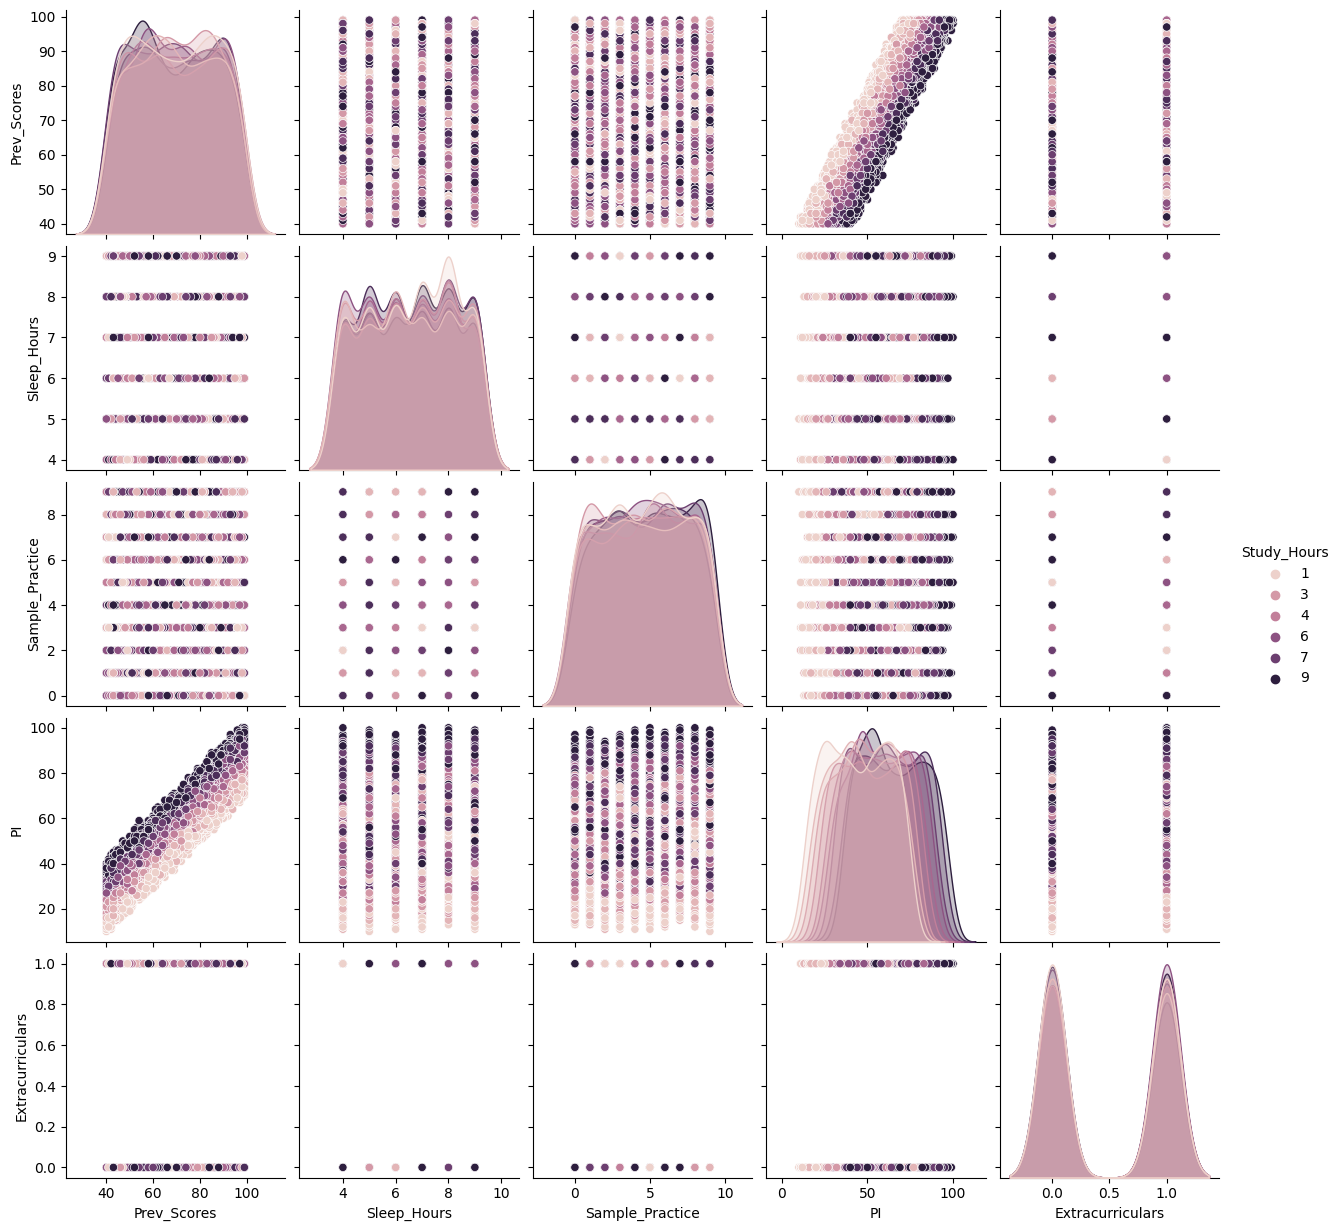

In [7]:
sns.pairplot(data, hue='Study_Hours')

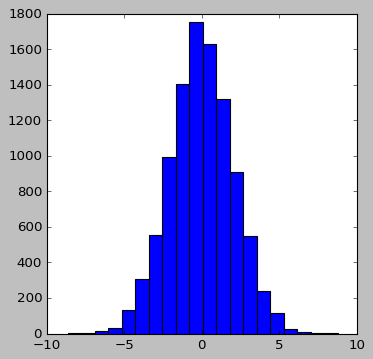

In [9]:
residuals = y - res.predict()
plt.figure(figsize=(5,5))
plt.hist(residuals, bins = 20)
plt.style.use('_mpl-gallery')
plt.show()

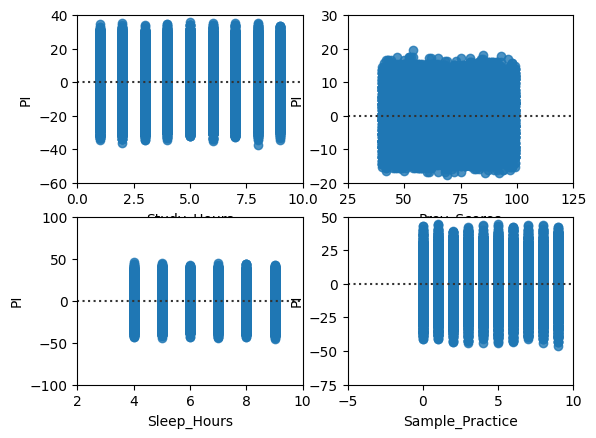

<Figure size 4000x4000 with 0 Axes>

In [8]:
fig, ax = plt.subplots(2,2)
plt.figure(figsize=(40,40))
sns.residplot(data=data, x='Study_Hours', y='PI', ax=ax[0, 0])
sns.residplot(data=data, x='Prev_Scores', y='PI', ax=ax[0, 1])
sns.residplot(data=data, x='Sleep_Hours', y='PI', ax=ax[1, 0])
sns.residplot(data=data, x='Sample_Practice', y='PI', ax=ax[1, 1])
plt.style.use('classic')
plt.show()


설명 (다중회귀분석)
1. scatter plot에 의하면 설명변수간 다중공선성은 의심되지 않음. PI와 Prev_Scores 사이에 강한 선형성이 나타남.
2. residual의 histogram에서 오차의 정규성을 확인할 수 있음.
3. residual plot에 따르면 오차의 등분산성이 성립함.
4. res의 summary에서 Durbin-Watson값이 2.001이므로 독립성이 있다고 판단함.
=> 선형회귀분석을 위한 가정 만족